# Taller 3
Presentado por
### Victor Manuel Dávila
### Oscar Javier Restrepo
### Daniel Lozano Barrero

## Adelgazamiento

Es una técnica que puede simplificar la forma de los objetos, por lo que reconocerlos es más sencillo.

En primer lugar se importan las librerías y se carga la imagen y se redimensiona:

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../../Proyecto/img/IMG_4C.jpg')
img = cv2.resize(img, (322, 351))

Ahora bien, se define la función _Hit Or Miss_ :

In [80]:
def hitOrMiss(A, B):
    B1 = np.copy(B)
    B2 = np.copy(cv2.bitwise_not(B))

    A_c = cv2.bitwise_not(A)
    HM1 = cv2.erode(A, B1, 1)
    HM2 = cv2.erode(A_c, B2, 1)
    HM = cv2.bitwise_and(HM1, HM2)
    return HM

Se define ahora la función encargada de crear el conjunto de elementos estructurales. Se crean dos elementos estructurales semilla, los cuales conforman el conjunto con sus respectivas rotaciones a $90°$, siendo estos elementos intercalados.

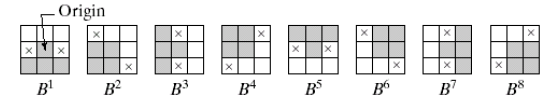

El parámetro $k$ indica la cantidad de elementos estructurales presentes en el conjunto.

In [81]:
def genSE(A, k):
    B = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5), (0, 0))
    B_h, B_w = B.shape

    B1 = np.copy(B)
    B2 = np.copy(B)
    
    SE = []

    for i in range(B_h):
        for j in range(B_w):
            if (i < B_h/3) or ((j < B_w/3 or j > 2*B_w/3) and (i > B_h/3 and i < 2*B_h/3)): B1[i][j] = 0
            if not (i > B_h/2 and j < B_w/2): B2[i][j] = 0
    
    for i in range(k):
        if i%2 == 0:
            SE.append(B1)
            B1 = np.rot90(B1, k = -1)
        else:
            SE.append(B2)
            B2 = np.rot90(B2, k = -1)
        
    return SE

Se define la función de adelgazamiento. La función _thin_ representa a la operación $A\otimes B$.

La función _Thinning_ obtiene la imagen adelgazada de A $\to$ $A\otimes \{B\}$.

In [87]:
def thin(A, B):
    thinned = A - hitOrMiss(A, B)
    return thinned

def Thinning(A, k):
        B = genSE(A, k)

        Thinned = A
        for B_i in B:
            Thinned = thin(Thinned, B_i)

        return Thinned

Se obtienen las imágenes adelgazadas para distintos $k$ :

(<Axes: title={'center': 'Adelgazada: k = 100'}>,
 Text(0.5, 1.0, 'Adelgazada: k = 100'))

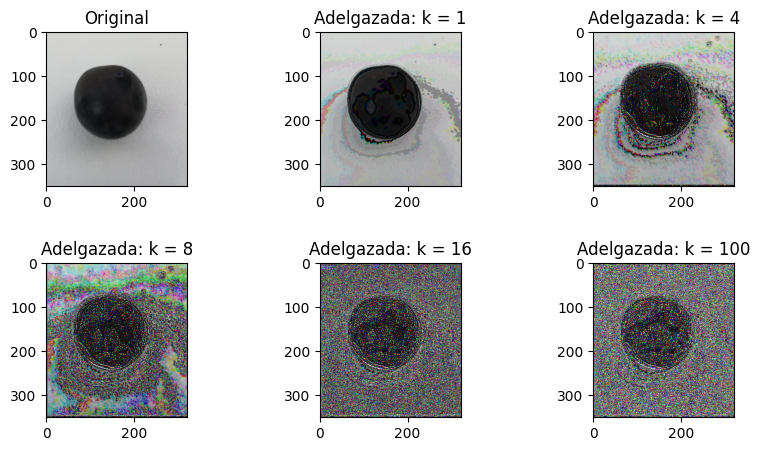

In [86]:
thinned1 = Thinning(img, 1)
thinned2 = Thinning(img, 4)
thinned3 = Thinning(img, 8)
thinned4 = Thinning(img, 16)
thinned5 = Thinning(img, 100)

fig, axs = plt.subplots(2, 3, figsize=(10, 5), gridspec_kw={'hspace': 0.5})
plt.subplot(231), plt.imshow(img), plt.title('Original')
plt.subplot(232), plt.imshow(thinned1), plt.title('Adelgazada: k = 1')
plt.subplot(233), plt.imshow(thinned2), plt.title('Adelgazada: k = 4')
plt.subplot(234), plt.imshow(thinned3), plt.title('Adelgazada: k = 8')
plt.subplot(235), plt.imshow(thinned4), plt.title('Adelgazada: k = 16')
plt.subplot(236), plt.imshow(thinned5), plt.title('Adelgazada: k = 100')

Se puede notar que el adelgazamiento introduce contornos. No obstante, al aumentar el número de iteraciones, se produce mucho ruidoo de tipo sal y pimienta. Además, se puede concluir que después de un gran número de iteraciones, seguir iterando producirá resultados muy similares; los resultados son convergentes.

La el área de la superficie de la uva disminuye. Además, si se aplica un filtro de suavizado después del adelgazamiento, se podría eliminar el ruido en la imagen.

Adicionalmente, se puede apreciar que los contornos generados son producto de ligeros cambios de la intensidad del nivel de gris en la sombra. Un número apreciable de iteraciones de adelgazamiento oscurece la imagen, ya que el adelgazamiento reduce el área de regiones continuas con niveles altos de gris (ver cómo las líneas blancas en la imagen para k = 8, desaparecen cuando se adelgaza la imagen con k = 16).

## Esqueleto

Este proceso simplifica una imagen, de tal manera que una vez encontrado el esqueleto de la misma, se puede ejecutar el proceso inverso para hallar la imagen original. Esto es útil para compresión de imágenes, con la finalidad de ocupar menos espacio en la memoria de los dispositivos.

El parámetro _morph_ define la geometría del elemento estructural.

Se ejecuta el algoritmo con una imagen distinta a las utilizadas en el proyecto, con la finalidad de apreciar mejor el resultado.

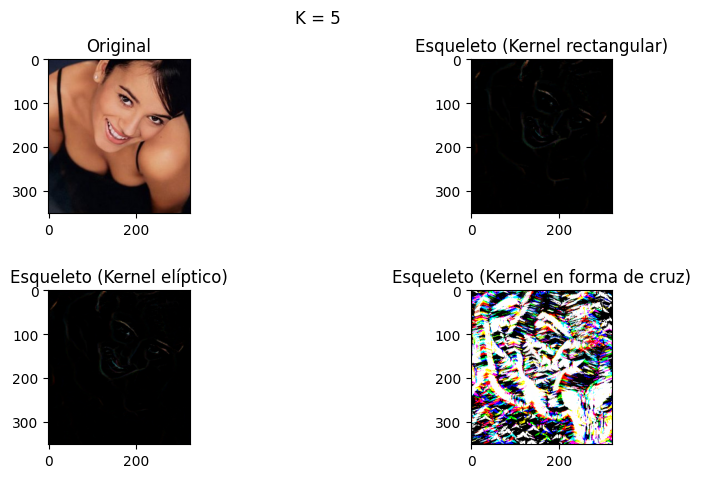

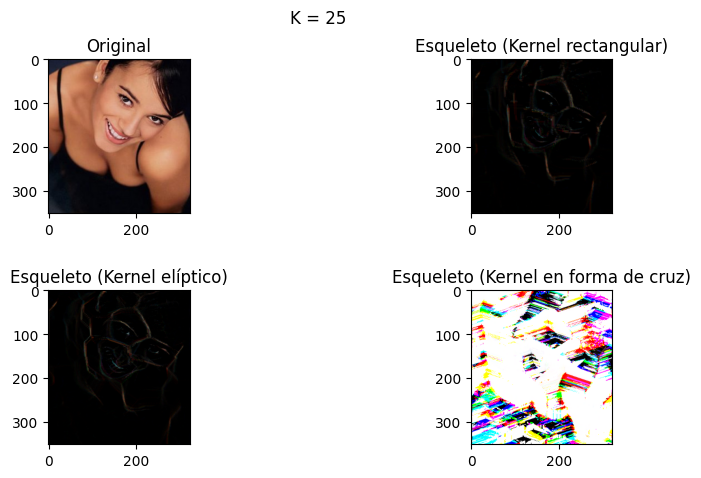

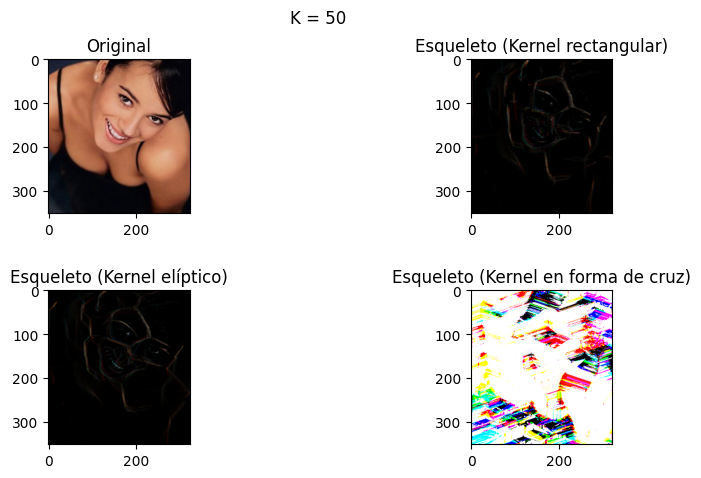

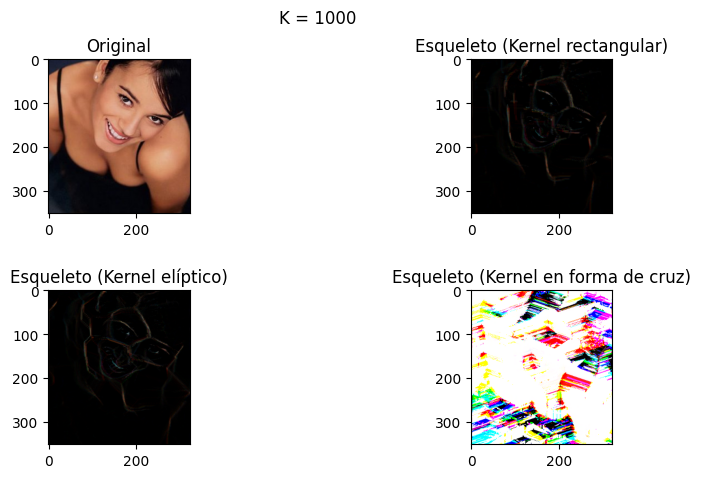

In [106]:
img1 = cv2.imread('taller3img/test.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

def getSk(A, B, k):
    Sk0 = cv2.erode(A, B, iterations = k)
    Sk = Sk0 - cv2.morphologyEx(Sk0, cv2.MORPH_OPEN, B)
    return Sk

def getSkeleton(A, morph, K):
    ES = cv2.MORPH_RECT
    if(morph == 1):
        ES = cv2.MORPH_ELLIPSE
    elif(morph == 2):
        ES = cv2.MORPH_CROSS

    B = cv2.getStructuringElement(ES, (7, 5), (3, 1))

    Sk = None
    skeleton = np.zeros_like(A)
    for k in range(1, K):
        Sk = getSk(A, B, k)
        skeleton = cv2.bitwise_or(skeleton, Sk)

    return skeleton


sk1, sk2, sk3 = 0, 0, 0

def setSkSetAndPlot(K):
    global sk1, sk2, sk3
    sk1 = getSkeleton(img1, 0, K)
    sk2 = getSkeleton(img1, 1, K)
    sk3 = getSkeleton(img1, 2, K)

    fig, axs = plt.subplots(2, 2, figsize=(10, 5), gridspec_kw={'hspace': 0.5})
    fig.suptitle('K = {0}'.format(K))
    plt.subplot(221), plt.imshow(img1), plt.title('Original')
    plt.subplot(222), plt.imshow(sk1), plt.title('Esqueleto (Kernel rectangular)')
    plt.subplot(223), plt.imshow(sk2), plt.title('Esqueleto (Kernel elíptico)')
    plt.subplot(224), plt.imshow(sk3), plt.title('Esqueleto (Kernel en forma de cruz)')

setSkSetAndPlot(5)
setSkSetAndPlot(25)
setSkSetAndPlot(50)
setSkSetAndPlot(100)

Se puede apreciar que se adquiere de manera general una imagen simplificada, la cual posee trazos o contornos de la imagen original. Con respecto a la geometría del _Kernel_, utilizar forma rectangular con respecto a una forma elíptica no varía mucho el resultado. No obstante, se puede apreciar ligeramente que un _Kernel_ elíptico resalta más los contornos.
Por otro lado, se observa que un _Kernel_ en forma de cruz distorsiona visiblemente la imagen original, no se obtiene un esqueleto muy claro a menos que se use un número bajo de iteraciones (caso $k = 5$).

Con respecto al número de iteraciones, uno mayor hace que el contorno sea más visible.

### Erosión
Se hacen las pruebas con diferentes iteraciones y kernel. Se utiliza una imagen diferente a las empleadas en el proyecto por la facilidad de evidenciar los efectos de las operaciones morfológicas

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

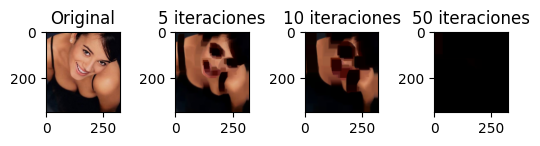

In [39]:
#interior = cv2.imread('interior.jpg')
interior = cv2.imread('taller3img/test.png')
interiorRGB= cv2.cvtColor(interior, cv2.COLOR_BGR2RGB)
kernel=np.ones((5,5),np.uint8)
erosion1=cv2.erode(interiorRGB,kernel,iterations=5)
erosion2=cv2.erode(interiorRGB,kernel,iterations=10)
erosion3=cv2.erode(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(erosion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(erosion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(erosion3), plt.title('50 iteraciones')


Aplicamos un kernel Elipse

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

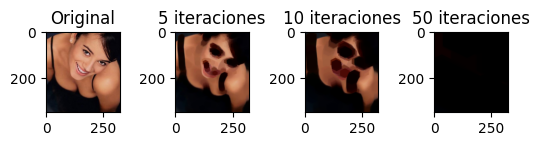

In [29]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
erosion1=cv2.erode(interiorRGB,kernel,iterations=5)
erosion2=cv2.erode(interiorRGB,kernel,iterations=10)
erosion3=cv2.erode(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(erosion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(erosion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(erosion3), plt.title('50 iteraciones')

Aplicacmos un kernel Cruz

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

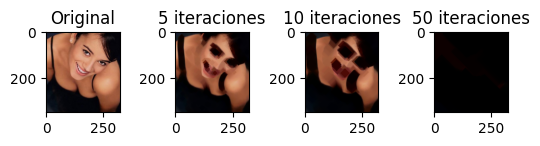

In [30]:
kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
erosion1=cv2.erode(interiorRGB,kernel,iterations=5)
erosion2=cv2.erode(interiorRGB,kernel,iterations=10)
erosion3=cv2.erode(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(erosion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(erosion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(erosion3), plt.title('50 iteraciones')

Cuando se emplean pocas iteraciones no se evidencian diferencias significativas con el kernel empleado. A medida que el número de iteraciones aumenta, los efectos de cambio de kernel se hacen más notorias.

### Dilatación

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

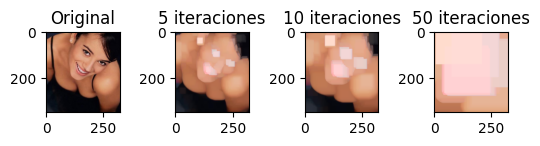

In [31]:
kernel=np.ones((5,5),np.uint8)
dilatacion1=cv2.dilate(interiorRGB,kernel,iterations=5)
dilatacion2=cv2.dilate(interiorRGB,kernel,iterations=10)
dilatacion3=cv2.dilate(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(dilatacion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(dilatacion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(dilatacion3), plt.title('50 iteraciones')

Kernel Elipse

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

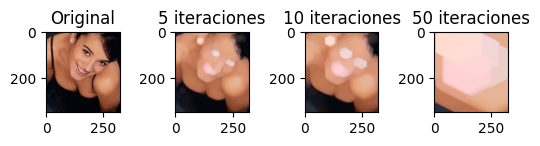

In [32]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilatacion1=cv2.dilate(interiorRGB,kernel,iterations=5)
dilatacion2=cv2.dilate(interiorRGB,kernel,iterations=10)
dilatacion3=cv2.dilate(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(dilatacion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(dilatacion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(dilatacion3), plt.title('50 iteraciones')

Kernel Cruz

(<Axes: title={'center': '50 iteraciones'}>,
 Text(0.5, 1.0, '50 iteraciones'))

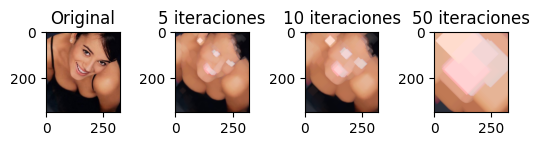

In [33]:
kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
dilatacion1=cv2.dilate(interiorRGB,kernel,iterations=5)
dilatacion2=cv2.dilate(interiorRGB,kernel,iterations=10)
dilatacion3=cv2.dilate(interiorRGB,kernel,iterations=50)

plt.subplot(441), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(442), plt.imshow(dilatacion1), plt.title('5 iteraciones')
plt.subplot(443), plt.imshow(dilatacion2), plt.title('10 iteraciones')
plt.subplot(444), plt.imshow(dilatacion3), plt.title('50 iteraciones')

En la erosión sucede algo similar a la dilatación. Cuando se emplean pocas iteraciones no se evidencian diferencias significativas con el kernel empleado. A medida que el número de iteraciones aumenta, los efectos de cambio de kernel se hacen más notorias.

### Operaciones complejas
Con kernel Elipse

(<Axes: title={'center': 'BlackHat'}>,
 Text(0.5, 1.0, 'BlackHat'))

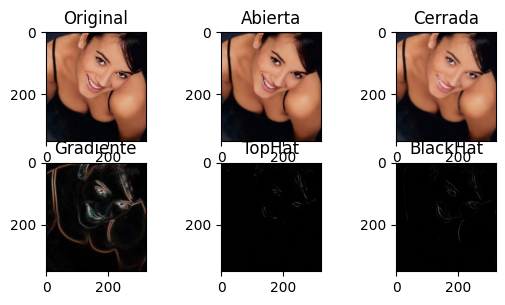

In [34]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
abierta=cv2.morphologyEx(interiorRGB,cv2.MORPH_OPEN,kernel)
cerrada=cv2.morphologyEx(interiorRGB,cv2.MORPH_CLOSE,kernel)
gradiente=cv2.morphologyEx(interiorRGB,cv2.MORPH_GRADIENT,kernel)
tophat=cv2.morphologyEx(interiorRGB,cv2.MORPH_TOPHAT,kernel)
blackhat=cv2.morphologyEx(interiorRGB,cv2.MORPH_BLACKHAT,kernel)
plt.subplot(331), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(332), plt.imshow(abierta), plt.title('Abierta')
plt.subplot(333), plt.imshow(cerrada), plt.title('Cerrada')
plt.subplot(334), plt.imshow(gradiente), plt.title('Gradiente')
plt.subplot(335), plt.imshow(tophat), plt.title('TopHat')
plt.subplot(336), plt.imshow(blackhat), plt.title('BlackHat')

Kernel cruz

(<Axes: title={'center': 'BlackHat'}>,
 Text(0.5, 1.0, 'BlackHat'))

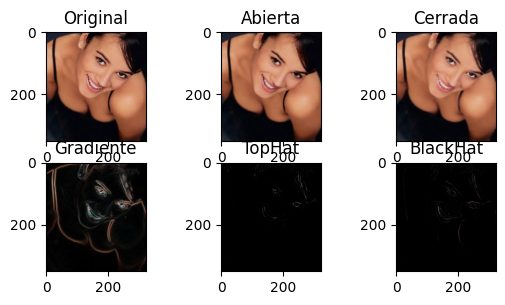

In [35]:
kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
abierta=cv2.morphologyEx(interiorRGB,cv2.MORPH_OPEN,kernel)
cerrada=cv2.morphologyEx(interiorRGB,cv2.MORPH_CLOSE,kernel)
gradiente=cv2.morphologyEx(interiorRGB,cv2.MORPH_GRADIENT,kernel)
tophat=cv2.morphologyEx(interiorRGB,cv2.MORPH_TOPHAT,kernel)
blackhat=cv2.morphologyEx(interiorRGB,cv2.MORPH_BLACKHAT,kernel)
plt.subplot(331), plt.imshow(interiorRGB), plt.title('Original')
plt.subplot(332), plt.imshow(abierta), plt.title('Abierta')
plt.subplot(333), plt.imshow(cerrada), plt.title('Cerrada')
plt.subplot(334), plt.imshow(gradiente), plt.title('Gradiente')
plt.subplot(335), plt.imshow(tophat), plt.title('TopHat')
plt.subplot(336), plt.imshow(blackhat), plt.title('BlackHat')

Como en los casos anteriores de dilatación y erosión cuando se emplean pocas iteraciones no se evidencian diferencias significativas con el kernel empleado. A medida que el número de iteraciones aumenta, los efectos de cambio de kernel se hacen más notorias.